In [1]:
import os
import pandas as pd
import numpy as np
from common.utils import load_data, extract_data
# adjust the format of the data set
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
data_dir = "data"
# if not done already, extract zipped data and save as csv
ts_data = load_data(data_dir)

ts_data.head(10) 

,load,temp
2012-01-01 00:00:00,"2,698.00",32.00
2012-01-01 01:00:00,"2,558.00",32.67
2012-01-01 02:00:00,"2,444.00",30.00
2012-01-01 03:00:00,"2,402.00",31.00
2012-01-01 04:00:00,"2,403.00",32.00
2012-01-01 05:00:00,"2,453.00",31.33
2012-01-01 06:00:00,"2,560.00",30.00
2012-01-01 07:00:00,"2,719.00",29.00
2012-01-01 08:00:00,"2,916.00",29.00
2012-01-01 09:00:00,"3,105.00",33.33


In [2]:
ts_data.isna().sum()

load    0
temp    0
dtype: int64

In [3]:
ts_data.dtypes

load    float64
temp    float64
dtype: object

In [4]:
ts_data.describe()

,load,temp
count,"26,304.00","26,304.00"
mean,"3,303.77",47.77
std,564.58,19.34
min,"1,979.00",-13.67
25%,"2,867.00",32.67
50%,"3,364.00",48.33
75%,"3,690.00",63.67
max,"5,224.00",95.00


In [5]:
# import necessary Python packages
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

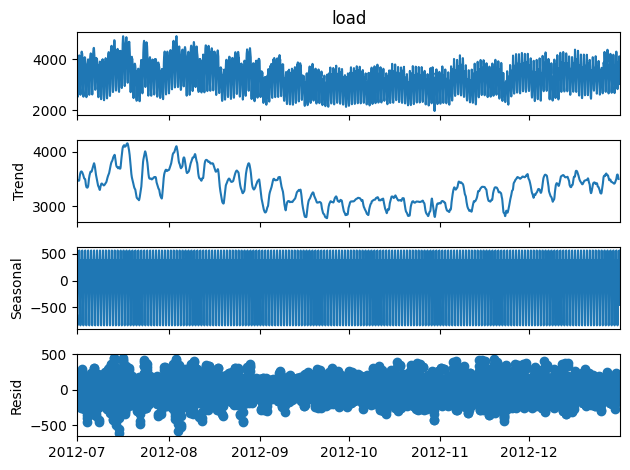

In [6]:
ts_data_load = ts_data['load']
decomposition = sm.tsa.seasonal_decompose(ts_data_load['2012-07-01':'2012-12-31'], model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [10.0, 6.0]

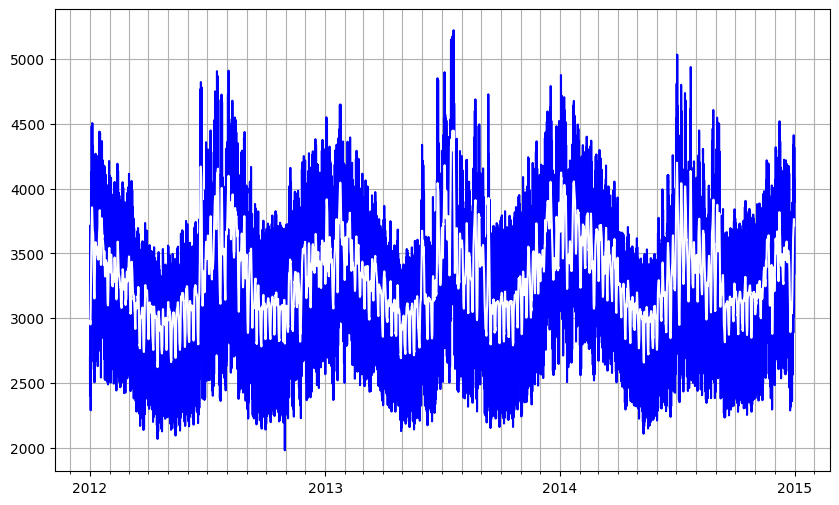

In [7]:
decomposition = sm.tsa.seasonal_decompose(ts_data_load, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(ts_data_load.index, ts_data_load, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='white')